<a href="https://colab.research.google.com/github/EveCoronel/mi-portafolio/blob/main/dogBreeds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow opencv-python matplotlib

In [1]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt

# Data Cleaning
Deletes all the images that have different extensions from the image_extensions list.

In [2]:
import cv2
import imghdr
data_dir = 'data'
image_extensions = ['jpeg','jpg', 'bmp', 'png']
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_extensions:
                print('Invalid format {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)

Invalid format data/0/maryna-tomkings-puppies-1-1024x683.jpg.webp
Invalid format data/0/GettyImages-821730372-e1705934561973.jpg
Invalid format data/0/french-bulldog-blue-puppy-enjoying-260nw-2430201485.jpg
Invalid format data/0/blue-brindle-frenchie-tomkings-puppy-2-1024x683.jpg.webp
Invalid format data/0/Photo-2020.-03.-29.-18-24-21-e1586436552477.jpg.webp
Invalid format data/0/shutterstock_1974509900-2-scaled-1.jpg
Invalid format data/0/D_NQ_NP_976016-MLU73509944316_122023-O.webp
Invalid format data/0/0Y2A6620.jpg
Invalid format data/0/D_NQ_NP_639826-MLM72920760219_112023-O.webp
Invalid format data/0/6exlGpcXkQgJJZ8B5T3w4Z.jpeg
Invalid format data/0/French-Bulldog-Guide-to-the-Breed-For-New-Owners.webp
Invalid format data/0/French-bulldog.jpg
Invalid format data/0/cute-french-bulldog-puppy-eight-260nw-2322351863.jpg
Invalid format data/0/French-Bulldog-puppy-standing-in-the-grass-holding-a-ball-in-its-mouth.jpg
Invalid format data/0/portrait-french-bulldog-puppy-tiger-600nw-21922973

# Pre-processing Data
Rescale images and divide them into training and validation sets.

In [3]:
data = tf.keras.utils.image_dataset_from_directory('data', batch_size=32)

Found 691 files belonging to 4 classes.


Visualizing data

In [4]:
data_iterator = data.as_numpy_iterator()

In [7]:
batch = data_iterator.next()

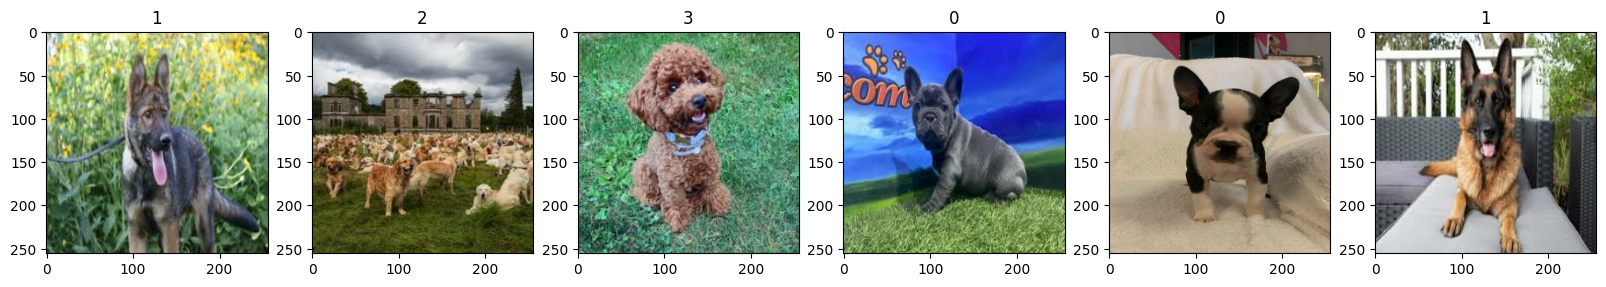

In [8]:
fig, ax = plt.subplots(ncols=6, figsize=(20,20))
for idx, img in enumerate(batch[0][:6]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Rescale

In [9]:
data = data.map(lambda x,y: (x/255, y))

In [10]:
train_size = int(len(data)*.8)
val_size = int(len(data)*.2) + 1

In [11]:
train_size, val_size, len(data)


(17, 5, 22)

In [12]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)

# CNN Architecture

Creating and configuring CNN architecture

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [14]:
model = Sequential()

model.add(Conv2D(64, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# Training model

In [16]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
17/17 [==============================] - 24s 720ms/step - loss: 1.4112 - accuracy: 0.2794 - val_loss: 1.3798 - val_accuracy: 0.2789
Epoch 2/20
17/17 [==============================] - 15s 742ms/step - loss: 1.3842 - accuracy: 0.3474 - val_loss: 1.3446 - val_accuracy: 0.3946
Epoch 3/20
17/17 [==============================] - 15s 753ms/step - loss: 1.3532 - accuracy: 0.3548 - val_loss: 1.3479 - val_accuracy: 0.4286
Epoch 4/20
17/17 [==============================] - 19s 953ms/step - loss: 1.2918 - accuracy: 0.4632 - val_loss: 1.1933 - val_accuracy: 0.5918
Epoch 5/20
17/17 [==============================] - 16s 831ms/step - loss: 0.9889 - accuracy: 0.6397 - val_loss: 0.7760 - val_accuracy: 0.6803
Epoch 6/20
17/17 [==============================] - 16s 807ms/step - loss: 0.6272 - accuracy: 0.7849 - val_loss: 0.4647 - val_accuracy: 0.8912
Epoch 7/20
17/17 [==============================] - 15s 741ms/step - loss: 0.3437 - accuracy: 0.8952 - val_loss: 0.2573 - val_accuracy: 0.9456

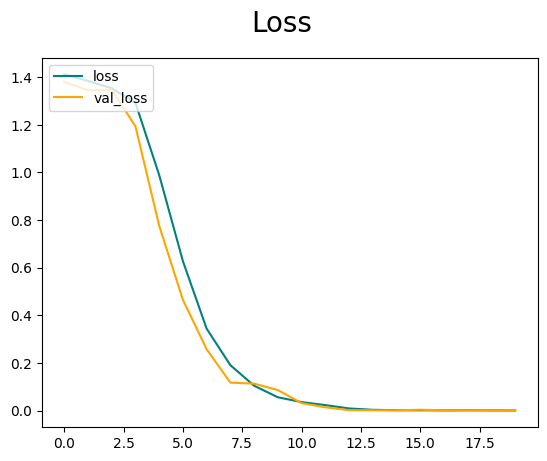

In [17]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [74]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','dogBreeds.keras'))

# Testing model

In [45]:
import cv2

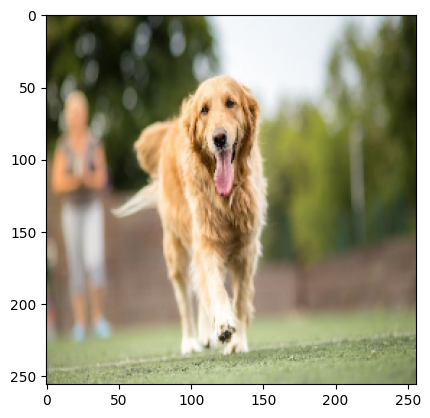

In [71]:
path = os.path.join("test", "golden.jpg")
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

using model when created

In [72]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 22ms/step


using loaded model

In [75]:
model_path = os.path.join("models", "dogBreeds.keras")
loaded_model = load_model(model_path)

yhat = loaded_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 74ms/step


In [78]:
output = np.array(yhat)
class_labels = ['French Bulldog', 'German Shepherd', 'Golden', 'Poodle']

percentages = output * 100
percentages = np.round(percentages, 2)

# Obtener la clase con la mayor probabilidad
predicted_class_index = np.argmax(output, axis=-1)[0]
predicted_class_label = class_labels[predicted_class_index]

for idx, label in enumerate(class_labels):
    print(f"{label}: {int(percentages[0][idx])}%")

if int(percentages[0][predicted_class_index]) > 80:
    print(f"\nPredicted class: {predicted_class_label}")
else:
    print("Others")

French Bulldog: 0%
German Shepherd: 0%
Golden: 99%
Poodle: 0%

Predicted class: Golden
